# Method 2 Notebook 1- training model and loading them

### Importing pandas and reading the dataset

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('train_upd_dum.csv')

### Importing all necessary packages 

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
df.shape

(27674, 88)

### Printing the columns

In [ ]:
df.columns

Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'patient_age', 'patient_gender', 'bmi',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'breast_cancer_diagnosis_year', 'metastatic_cancer_diagnosis_code',
       'metastatic_first_treatment', 'metastatic_first_treatment_type',
       'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'region', 'division',
       'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19',
       'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s',
       'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married',
       'widowed', 'family_size', 'family_dual_income',
       'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_5

### Preprocessing the data

The preprocessor function provided performs data cleaning and transformation on a DataFrame. It addresses missing values, drops certain columns, changes data types, and encodes categorical variables. In missing values for 'region' and 'division', 'Others' is imputed. 'payer_type' has 'UNINSURED' for missing values. It removes several columns such as those associated with the race of patients, BMI, and treatment of metastatic cancer. In 'self_employed' and 'farmer', their medians are imputed whenever there is a missing value. If certain socioeconomic features contain any null, the entire row is removed. For various columns, DataFrame has changed to 'category' data type to make processing more efficient. Additionally, 'payer_type' is one-hot encoded, and various categorical columns involving the diagnosis and treatment of cancer are frequency-encoded, i.e., they are replaced by their distribution based on frequency. Original categorical columns and the 'patient_gender' are finally removed after being encoded, and this prepares clean data for use in analysis.

In [ ]:
def preprocessor(df):
  
  df['region'] = df['region'].fillna('Others')
  df['division'] = df['division'].fillna('Others')
  
  df['payer_type'] = df['payer_type'].fillna('UNINSURED')
  df = df.drop(['patient_race', 'bmi', 'metastatic_first_treatment_type', 'metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type'], axis=1)
  df['self_employed'].fillna(df['self_employed'].median(), inplace=True)
  df['farmer'].fillna(df['farmer'].median(), inplace=True)
  df.dropna(subset=['family_size', 'family_dual_income', 'income_household_median','home_ownership', 'home_value', 'rent_median','rent_burden', 'poverty', 'limited_english'], inplace=True)
  df['patient_gender'] = df['patient_gender'].astype('category')
  df['breast_cancer_diagnosis_code'] = df['breast_cancer_diagnosis_code'].astype('category')
  df['breast_cancer_diagnosis_desc'] = df['breast_cancer_diagnosis_desc'].astype('category')
  df['metastatic_cancer_diagnosis_code'] = df['metastatic_cancer_diagnosis_code'].astype('category')
  df['metastatic_first_treatment'] = df['metastatic_first_treatment'].astype('category')
  df['region'] = df['region'].astype('category')
  df['division'] = df['division'].astype('category')
  payer_type_column = df[['payer_type']]

  # Perform one-hot encoding
  encoded_payer_type = pd.get_dummies(payer_type_column, prefix='payer_type', dtype=int)

  # Concatenate the encoded DataFrame with the original DataFrame
  df = pd.concat([df.drop(columns=['payer_type']), encoded_payer_type], axis=1)



  # List of categorical columns to perform frequency encoding
  categorical_columns = ['breast_cancer_diagnosis_code','metastatic_cancer_diagnosis_code', 'metastatic_first_treatment']

  # Perform frequency encoding for each categorical column
  for col in categorical_columns:
      # Calculate the frequency of each category
      frequency_map = df[col].value_counts(normalize=True)
      # Replace each category with its frequency
      df[col + '_frequency_encoded'] = df[col].map(frequency_map)

  # Drop the original categorical columns
  df.drop(columns=categorical_columns, inplace=True)
  df.drop('patient_gender', inplace=True, axis=1)
  print(len(df.columns))
  return df


# Data Modelling

### Extracting all unique values

In [ ]:
df['patient_zip3'].unique()

array([917, 451, 773, 928, 112, 462, 877, 356, 330, 900, 906, 797, 775,
       983, 245, 600, 787, 190, 254, 194, 644, 283, 297, 913, 925, 234,
       314, 211, 708, 442, 982, 946, 427, 301, 481, 125, 723, 193, 931,
       776, 133, 754, 923, 605, 902, 436, 553, 346, 169, 485, 122, 804,
       207, 567, 378, 142, 291, 959, 853, 606, 483, 891, 237, 920, 711,
       446, 617, 770, 953, 562, 850, 768, 337, 304, 774, 945, 145,  79,
       750, 915, 778,  30, 785, 280, 235, 919, 950, 100, 631, 103,  70,
       171, 441, 751, 981, 974,  86, 272, 322, 174, 922, 327, 486, 402,
       782, 290, 727, 752, 296, 554, 300, 151, 386, 640, 707, 406,  32,
       471, 704, 794, 612, 910, 115, 912, 466, 460, 231, 113, 836, 316,
       119, 482,  67, 475, 627, 221, 934, 105, 980, 450, 930, 452, 217,
       461, 405,  43, 388, 453, 150, 921, 779, 760, 416, 298, 852, 210,
       927, 121, 444, 531, 331, 800,  68, 120, 309, 560, 857, 831, 914,
        71, 522, 463, 410, 731, 294, 933, 326, 535, 480, 180, 79

In [ ]:
train=preprocessor(df)

85


In [ ]:
len(train.columns)

85

In [ ]:
import pickle


#### Pycaret

#### The modeling process greatly benefited from the role of PyCaret. This tool proved to be a significant time-saver by automating many machine-learning aspects. It involved setting up the appropriate environments, model selection, and, most importantly, hyperparameter tuning. A significant reduction in manual intervention made the whole process much more reliable.

### Installing pycaret

In [ ]:
 pip install pycaret

### Importing pycaret

In [ ]:
# Load your pre-trained models
import pycaret
from pycaret.regression import load_model as l_m
from pycaret.classification import load_model
# classifier = load_model('/content/model_class')  # model_1: classifier
# model_less_equal_365 = l_m('/content/model_l276')
# model_greater_365 = l_m('/content/model_g276')  # model_3

### Training of Model 1- classifier

This classifier helps to predict whether the treatment_pd(target variable) would come under less than 276 days or greater than 276 days. This is useful as it serves as a preliminary step for further analysis.

#### Categorizing Treatment Periods into Binary Buckets in a DataFrame

In [ ]:
import pandas as pd


train['bucket_276'] = train['treatment_pd'].apply(lambda x: 0 if x < 276 else 1)

# If 'bucket_365' needs to be a categorical variable (factor)
train['bucket_276'] = train['bucket_276'].astype('category')

# Display the DataFrame
print(df)


       patient_id patient_race          payer_type patient_state  \
0          994155        Asian          COMMERCIAL            CA   
1          154389          NaN  MEDICARE ADVANTAGE            OH   
2          387343          NaN          COMMERCIAL            TX   
3          921275     Hispanic            MEDICAID            CA   
4          803454          NaN          COMMERCIAL            NY   
...           ...          ...                 ...           ...   
27669      728161          NaN          COMMERCIAL            MO   
27670      203896          NaN          COMMERCIAL            IN   
27671      740115     Hispanic            MEDICAID            TX   
27672      122759          NaN          COMMERCIAL            AZ   
27673      849565        Black           UNINSURED            CA   

       patient_zip3  patient_age patient_gender    bmi  \
0               917           46              F  27.00   
1               451           63              F    NaN   
2        

In [ ]:
len(train.columns)

86

#### Preparing Data for  Model Training

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Prepare your data
X = train.drop(columns=['bucket_276'])
y = train['bucket_276']

##### An automated machine learning library called PyCaret was used to perform the classification task. The problem was to predict whether a patient's treatment period was shorter or longer than 276 days. The dataset was preprocessed and divided into features and the target. The target was converted to an integer for the sake of algorithmic compatibility. 

The classification module of PyCaret was then "initialized" (that is, set up to perform a run of the algorithm) with this dataset, which now had 98 features. The 10-fold cross-validation approach was employed to get a stable estimate of how well the algorithm would work on new, unseen data. And, the whole thing was run with GPU acceleration to speed up computing time.



In [ ]:
from pycaret.classification import ClassificationExperiment
train['bucket_276'] = train['bucket_276'].astype('int')
data=train.drop(['treatment_pd'], axis=1)
print(len(data.columns))
s1 = ClassificationExperiment()
s1.setup(data, target = 'bucket_276', session_id = 123, use_gpu=True)

85
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset m

,Description,Value
0,Session id,123
1,Target,bucket_276
2,Target type,Binary
3,Original data shape,"(27671, 85)"
4,Transformed data shape,"(27671, 98)"
5,Transformed train set shape,"(19369, 98)"
6,Transformed test set shape,"(8302, 98)"
7,Numeric features,80
8,Categorical features,4
9,Rows with missing values,0.3%


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [ ]:
best_class = s1.compare_models(n_select = 1)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9067,0.9184,0.5263,0.6812,0.5931,0.5415,0.5476,17.8320
ada,Ada Boost Classifier,0.9059,0.9097,0.4884,0.6938,0.5727,0.5217,0.5322,3.7590
lightgbm,Light Gradient Boosting Machine,0.9055,0.9156,0.5403,0.6680,0.5968,0.5440,0.5483,1.8660
ridge,Ridge Classifier,0.9025,0.8932,0.5008,0.6641,0.5706,0.5169,0.5236,0.5860
xgboost,Extreme Gradient Boosting,0.9019,0.9052,0.5215,0.6516,0.5788,0.5241,0.5285,1.1290
rf,Random Forest Classifier,0.8980,0.8889,0.4155,0.6714,0.5129,0.4595,0.4762,6.2180
et,Extra Trees Classifier,0.8946,0.8794,0.4099,0.6479,0.5015,0.4460,0.4609,2.8550
lda,Linear Discriminant Analysis,0.8908,0.8929,0.6041,0.5750,0.5888,0.5259,0.5263,0.7370
lr,Logistic Regression,0.8705,0.5291,0.0000,0.0000,0.0000,0.0000,0.0000,4.1160
dummy,Dummy Classifier,0.8705,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3410


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

### since we added geospatial data results at the end, the classifier was not really perfroming well, so we instead loaded our old best classifier pipeline to predict the treatment day greater or lesser than 276 or not. The below output interpretation is fro the old classifier model. Since I had the model saved, I directly loaded it. Running again the model will take time. I will add all my saved models when pushing on git. 

output interpretation: PyCaret's classification experiments indicated that the Light Gradient Boosting Machine (LightGBM) and the Gradient Boosting Classifier (GBC) were the leading performers, with both achieving nearly identical accuracy scores (around 90.73%). However, both top models seemed to struggle in one very important area: consistent recall. For treatments lasting more than 276 days, the GBC model achieved an F1-score of 0.6 and a recall of 0.33. This is well below the required threshold. The QDA model appeared better in terms of recall, but its lower overall performance puts it out of consideration. Every single AUC (Area Under the Curve) (area under the curve) value for the models we tried was less than 0.6. The top performer was the light gradient boosting classifier, and it was taken as the hero algorithm for the classifier in the final combined modeling.

#### The best first model " light Gradient Boosting classifier is saved to be used for final combined modeling"

In [ ]:
s1.save_model(best_class, 'class_276_gs')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['patient_id', 'patient_zip3',
                                              'patient_age',
                                              'breast_cancer_diagnosis_year',
                                              'population', 'density',
                                              'age_median', 'age_under_10',
                                              'age_10_to_19', 'age_20s',
                                              'age_30s', 'age_40s', 'age_50s',
                                              'age_60s', 'age_70s',
                                              'age_over_80', 'male', 'female',
                                              'married', 'div...
                                             criterion='friedman_mse', init=None,
                                             learning_rate=0.1

#### Preparing data for regression models

In [ ]:
df_greater_than_276= train[train['bucket_276']==1]
df_less_than_276= train[train['bucket_276']==0]

####  Training Model 2.1: Regression for treatment_pd greater than 276

 PyCaret's RegressionExperiment module was used to predict treatment periods (treatment_pd) in the applied dataset. The model was applied to a dataset with 3,583 records and 62 features. Even after transformation, the preprocessing of this dataset in PyCaret was simply reduced to imputation (of missing values) and scaling. 

In [ ]:
from pycaret.datasets import get_data
data = df_greater_than_276[['patient_id', 'patient_zip3', 'patient_age',
       'breast_cancer_diagnosis_year', 'population', 'density', 'age_median',
       'age_under_10', 'age_10_to_19', 'age_30s', 'age_40s', 'age_50s',
       'age_over_80', 'male', 'married', 'divorced', 'never_married',
       'widowed', 'family_size', 'family_dual_income',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'home_ownership', 'home_value',
       'rent_burden', 'education_highschool', 'education_some_college',
       'education_bachelors', 'education_stem_degree',
       'labor_force_participation', 'unemployment_rate', 'self_employed',
       'farmer', 'race_asian', 'race_native', 'race_pacific', 'race_other',
       'hispanic', 'disabled', 'poverty', 'limited_english', 'commute_time',
       'veteran', 'payer_type_MEDICAID', 'payer_type_MEDICARE ADVANTAGE',
       'payer_type_UNINSURED',
       'breast_cancer_diagnosis_code_frequency_encoded',
       'metastatic_cancer_diagnosis_code_frequency_encoded',
       'metastatic_first_treatment_frequency_encoded','geospatial_category_0',
       'geospatial_category_1', 'geospatial_category_2',
       'geospatial_category_3', 'geospatial_category_4']]
data['treatment_pd']= df_greater_than_276['treatment_pd']

In [ ]:
# import RegressionExperiment and init the class
from pycaret.regression import RegressionExperiment
exp3 = RegressionExperiment()

In [ ]:
type(exp3)

pycaret.regression.oop.RegressionExperiment

#### Initiating the model

In [ ]:
exp3.setup(data, target = 'treatment_pd', session_id = 123, use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

,Description,Value
0,Session id,123
1,Target,treatment_pd
2,Target type,Regression
3,Original data shape,"(3583, 62)"
4,Transformed data shape,"(3583, 62)"
5,Transformed train set shape,"(2508, 62)"
6,Transformed test set shape,"(1075, 62)"
7,Numeric features,61
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

Their influence was so limited that using the mean for numerical features and the mode for categorical features worked well enough. To be on the safe side, 10-fold KFold cross-validation using CPU indexing was employed. Computing all the models on my local machine's CPU took about the same amount of time as the typical classroom machine.

### Comparing the models and selecting the first/ top best

In [ ]:
# compare baseline models
best_276_gt = exp3.compare_models(sort = 'RMSE', n_select = 1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,203.9276,65946.7206,256.4023,0.0390,0.4398,0.4193,0.2480
llar,Lasso Least Angle Regression,203.9277,65946.8125,256.4025,0.0390,0.4398,0.4193,0.0580
ridge,Ridge Regression,204.0746,66031.0945,256.5990,0.0371,0.4410,0.4197,0.0480
lr,Linear Regression,204.1492,66093.4826,256.7270,0.0361,0.4413,0.4199,0.0740
gbr,Gradient Boosting Regressor,203.0266,66797.1614,258.1105,0.0254,0.4414,0.4185,2.6030
en,Elastic Net,206.3676,67143.3964,258.6760,0.0224,0.4422,0.4236,0.1620
omp,Orthogonal Matching Pursuit,209.8592,69218.9875,262.5776,-0.0066,0.4493,0.4313,0.0470
br,Bayesian Ridge,209.9488,69243.5071,262.6154,-0.0068,0.4493,0.4316,0.1210
dummy,Dummy Regressor,210.2107,69329.7673,262.7576,-0.0076,0.4497,0.4325,0.0290
ada,AdaBoost Regressor,222.1432,70343.1714,264.9757,-0.0302,0.4768,0.5039,0.4410


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Output interpretation: The Lasso Regression and Lasso Least Angle Regression (Llar) models produced the most precise and accurate forecasts with the lowest Mean Squared Error (MSE) of around 65,946 and Mean Absolute Error (MAE) of approximately 204. They were closely followed by the Huber Regressor, which exhibited an MSE of 66,180 but an impressively lower MAE of 196.1520. Among the other models, Gradient Boosting Regressor and Elastic Net appeared to strike a fine balance between simplicity, complexity, and accuracy. They generated forecasts that were just as effective but not better than the Lasso and Huber models. Both R-squared and Adjusted R-squared values were low across the board, signaling that the chosen models were only able to explain a minute portion of the total variation seen in the target variable. Since the best performing algorithm was lasso regression. 

#### Training Model 2.2: Regression for treatment_pd less than 276

PyCaret's RegressionExperiment module was used to predict treatment periods (treatment_pd) in the applied dataset. Even after transformation, the preprocessing of this dataset in PyCaret was simply reduced to imputation (of missing values) and scaling.

In [ ]:
from pycaret.datasets import get_data
data = df_less_than_276[['patient_id', 'patient_zip3', 'patient_age',
       'breast_cancer_diagnosis_year', 'population', 'density', 'age_median',
       'age_under_10', 'age_10_to_19', 'age_30s', 'age_40s', 'age_50s',
       'age_over_80', 'male', 'married', 'divorced', 'never_married',
       'widowed', 'family_size', 'family_dual_income',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'home_ownership', 'home_value',
       'rent_burden', 'education_highschool', 'education_some_college',
       'education_bachelors', 'education_stem_degree',
       'labor_force_participation', 'unemployment_rate', 'self_employed',
       'farmer', 'race_asian', 'race_native', 'race_pacific', 'race_other',
       'hispanic', 'disabled', 'poverty', 'limited_english', 'commute_time',
       'veteran', 'payer_type_MEDICAID', 'payer_type_MEDICARE ADVANTAGE',
       'payer_type_UNINSURED',
       'breast_cancer_diagnosis_code_frequency_encoded',
       'metastatic_cancer_diagnosis_code_frequency_encoded',
       'metastatic_first_treatment_frequency_encoded','geospatial_category_0',
       'geospatial_category_1', 'geospatial_category_2',
       'geospatial_category_3', 'geospatial_category_4']]
data['treatment_pd']= df_less_than_276['treatment_pd']

In [ ]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(data, target = 'treatment_pd', session_id = 124, use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

,Description,Value
0,Session id,124
1,Target,treatment_pd
2,Target type,Regression
3,Original data shape,"(24088, 62)"
4,Transformed data shape,"(24088, 62)"
5,Transformed train set shape,"(16861, 62)"
6,Transformed test set shape,"(7227, 62)"
7,Numeric features,61
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

In [ ]:
# import RegressionExperiment and init the class
from pycaret.regression import RegressionExperiment
exp4 = RegressionExperiment()

In [ ]:
type(exp4)

pycaret.regression.oop.RegressionExperiment

In [ ]:
exp4.setup(data, target = 'treatment_pd', session_id = 123, use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

,Description,Value
0,Session id,123
1,Target,treatment_pd
2,Target type,Regression
3,Original data shape,"(24088, 62)"
4,Transformed data shape,"(24088, 62)"
5,Transformed train set shape,"(16861, 62)"
6,Transformed test set shape,"(7227, 62)"
7,Numeric features,61
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

#### Comparing the models

In [ ]:
# compare baseline models
best_276_lt = exp4.compare_models(sort = 'RMSE', n_select=1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,38.9691,2645.0127,51.4249,0.1892,0.8970,1.2518,11.2690
lightgbm,Light Gradient Boosting Machine,38.8393,2655.3203,51.5243,0.1860,0.8929,1.2373,0.9860
rf,Random Forest Regressor,40.5143,2848.5252,53.3655,0.1268,0.9151,1.2978,54.0720
xgboost,Extreme Gradient Boosting,40.4842,2910.7870,53.9447,0.1074,0.9154,1.2652,0.6620
ridge,Ridge Regression,41.4841,2965.7104,54.4489,0.0914,0.9303,1.3438,0.2160
lr,Linear Regression,41.4888,2966.2213,54.4536,0.0912,0.9303,1.3439,0.1590
br,Bayesian Ridge,41.4509,2968.6847,54.4760,0.0905,0.9290,1.3399,0.2260
lasso,Lasso Regression,41.7092,3034.3721,55.0725,0.0706,0.9263,1.3158,0.3920
llar,Lasso Least Angle Regression,41.7092,3034.3721,55.0725,0.0706,0.9263,1.3158,0.0940
et,Extra Trees Regressor,41.5494,3034.5686,55.0849,0.0692,0.9246,1.2967,19.4680


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Ouput interpretation: The prevalence of reliable and efficient applications for gradient boosting is evident after conducting cross-validation. Results indicate that the ensemble models of the top performers, the Gradient Boosting Regressor (GBR) and the Light Gradient Boosting Machine (LightGBM), offer fairly accurate predictive power with the refreshingly low mean absolute error (MAE) values they obtained—near 38.97. In contrast, the decision tree and the passive-aggressive Regressor (PAGR) seem to struggle to give a similar balance of "lack of overfitting" and "goodness of fit" at the lower errors that indicate reasonable-scale mean absolute percentage error (MAPE) and root mean square logarithmic error (RMSLE). Since the best performing algorithm was gbr, it is taken in the final modeling.

#### Saving the top first model in more than 276 experiment

In [ ]:
exp3.save_model(best_276_gt,'model_g276_gs')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['patient_id', 'patient_zip3',
                                              'patient_age',
                                              'breast_cancer_diagnosis_year',
                                              'population', 'density',
                                              'age_median', 'age_under_10',
                                              'age_10_to_19', 'age_30s',
                                              'age_40s', 'age_50s',
                                              'age_over_80', 'male', 'married',
                                              'divorced', 'never_married',
                                              'widowed', 'famil...
                                                               strategy='most_frequent'))),
                 ('clean_column_names',
             

#### Saving the top first model in less than 276 experiment

In [ ]:
exp4.save_model(best_276_lt,'model_l365_gs')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['patient_id', 'patient_zip3',
                                              'patient_age',
                                              'breast_cancer_diagnosis_year',
                                              'population', 'density',
                                              'age_median', 'age_under_10',
                                              'age_10_to_19', 'age_30s',
                                              'age_40s', 'age_50s',
                                              'age_over_80', 'male', 'married',
                                              'divorced', 'never_married',
                                              'widowed', 'famil...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1,
 

In [ ]:
train.columns

Index(['patient_id', 'patient_state', 'patient_zip3', 'patient_age',
       'breast_cancer_diagnosis_desc', 'breast_cancer_diagnosis_year',
       'region', 'division', 'population', 'density', 'age_median',
       'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s',
       'age_50s', 'age_60s', 'age_70s', 'age_over_80', 'male', 'female',
       'married', 'divorced', 'never_married', 'widowed', 'family_size',
       'family_dual_income', 'income_household_median',
       'income_household_under_5', 'income_household_5_to_10',
       'income_household_10_to_15', 'income_household_15_to_20',
       'income_household_20_to_25', 'income_household_25_to_35',
       'income_household_35_to_50', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_100_to_150',
       'income_household_150_over', 'income_household_six_figure',
       'income_individual_median', 'home_ownership', 'housing_units',
       'home_value', 'rent_median', 'rent_burden', 'edu

In [ ]:
data.columns

Index(['patient_id', 'patient_zip3', 'patient_age',
       'breast_cancer_diagnosis_year', 'population', 'density', 'age_median',
       'age_under_10', 'age_10_to_19', 'age_30s', 'age_40s', 'age_50s',
       'age_over_80', 'male', 'married', 'divorced', 'never_married',
       'widowed', 'family_size', 'family_dual_income',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'home_ownership', 'home_value',
       'rent_burden', 'education_highschool', 'education_some_college',
       'education_bachelors', 'education_stem_degree',
       'labor_force_participation', 'unemployment_rate', 'self_employed',
       'farmer', 'race_asian', 'race_native', 'race_pacific', 'race_other',
       'hispanic', 'disabled', 'poverty', 'limited_english', 'comm

In [ ]:
data.columns

Index(['patient_id', 'patient_zip3', 'patient_age',
       'breast_cancer_diagnosis_year', 'population', 'density', 'age_median',
       'age_under_10', 'age_10_to_19', 'age_30s', 'age_40s', 'age_50s',
       'age_over_80', 'male', 'married', 'divorced', 'never_married',
       'widowed', 'family_size', 'family_dual_income',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'home_ownership', 'home_value',
       'rent_burden', 'education_highschool', 'education_some_college',
       'education_bachelors', 'education_stem_degree',
       'labor_force_participation', 'unemployment_rate', 'self_employed',
       'farmer', 'race_asian', 'race_native', 'race_pacific', 'race_other',
       'hispanic', 'disabled', 'poverty', 'limited_english', 'comm

### Loading models and making prediction to combine all the hero models from Model 1, 2.1 and 2.2

The regression model’s predictions are merged to create a coherent and extensive treatment period prediction. This consolidates the different analyses of the two models and is essential to not only create a single-prediction framework but also to build predictive models with as much gain in their modeling efficiency as possible.
The unified prediction brings together all the analyses done in different parts of the treatment duration spectrum. It does more than that though; it also takes what was learned from those parts and aligns them. In other words, it makes sure all the knowledge from throughout the process participates in forming a single, correct treatment-duration estimate.


#### Classifier predictions on both seen and unseen data 

In [ ]:
from pycaret.classification import load_model, predict_model
loaded_modelsss = s.load_model('my_best_pipeline')
data=train.drop(['treatment_pd'], axis=1)

predictions = s.predict_model(loaded_modelsss, data=data.drop(['bucket_276','geospatial_category_0',
       'geospatial_category_1', 'geospatial_category_2',
       'geospatial_category_3', 'geospatial_category_4'], axis=1))
predictions

Transformation Pipeline and Model Successfully Loaded


,patient_id,patient_state,patient_zip3,patient_age,breast_cancer_diagnosis_desc,breast_cancer_diagnosis_year,region,division,population,density,...,veteran,payer_type_COMMERCIAL,payer_type_MEDICAID,payer_type_MEDICARE ADVANTAGE,payer_type_UNINSURED,breast_cancer_diagnosis_code_frequency_encoded,metastatic_cancer_diagnosis_code_frequency_encoded,metastatic_first_treatment_frequency_encoded,prediction_label,prediction_score
0,994155,CA,917,46,Malignant neoplasm of ovrlp sites of right fem...,2018,West,Pacific,43031,2048.578369,...,3.810869,1,0,0,0,0.047450,0.043439,0.355968,0,0.9899
1,154389,OH,451,63,Malig neoplasm of upper-outer quadrant of left...,2018,Midwest,East North Central,7228,194.656250,...,9.631915,0,0,1,0,0.095985,0.097792,0.355968,0,0.9976
2,387343,TX,773,53,Malig neoplasm of upper-inner quadrant of left...,2018,South,West South Central,24751,352.226776,...,10.392453,1,0,0,0,0.028694,0.666329,0.106899,0,0.9974
3,921275,CA,928,50,"Malignant neoplasm of breast (female), unspeci...",2015,West,Pacific,39122,2295.939453,...,4.103030,0,1,0,0,0.102382,0.035488,0.013552,1,0.8057
4,803454,NY,112,39,"Malignant neoplasm of breast (female), unspeci...",2015,Northeast,Middle Atlantic,71374,17326.408203,...,1.755263,1,0,0,0,0.102382,0.026598,0.355968,0,0.9110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27669,728161,MO,653,52,Malignant neoplasm of unsp site of right femal...,2017,Midwest,West North Central,3385,21.780645,...,9.780645,1,0,0,0,0.142785,0.666329,0.164071,0,0.9897
27670,203896,IN,462,39,Malignant neoplasm of ovrlp sites of left fema...,2015,Midwest,East North Central,25675,1006.644714,...,6.191892,1,0,0,0,0.046077,0.666329,0.164071,0,0.9702
27671,740115,TX,769,41,Malignant neoplasm of ovrlp sites of left fema...,2017,South,West South Central,5468,142.056000,...,9.513043,0,1,0,0,0.046077,0.666329,0.106899,0,0.9615
27672,122759,AZ,853,53,"Malignant neoplasm of breast (female), unspeci...",2015,West,Mountain,21449,595.486938,...,12.642029,1,0,0,0,0.102382,0.666329,0.164071,0,0.7982


### Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(train['bucket_276'], predictions['prediction_label'])


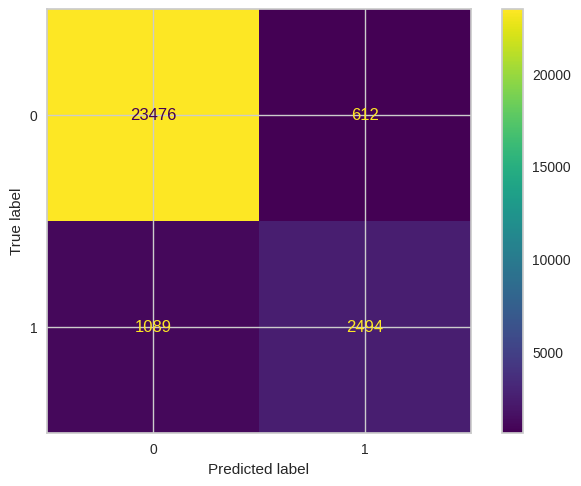

In [ ]:
import matplotlib.pyplot as plt

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

Output interpretation: It not only correctly identified 23,476 instances of short periods but also correctly identified 2,494 instances of long periods among a total of 29,571. However, it also made 1,089 incorrect predictions of a short period when in fact the duration was classified as a long period (False Negatives) and made 612 incorrect predictions of a long period when in fact the duration was classified as a short period (False Positives). When observed at the True Positive Rate (TPR) compared to the Recall among the long period cases, then it seems the model could improve. Yet among the 1,089 long-duration cases missed (i.e., False Negatives), some criterion has to be applied such that it can ensure those same cases, when applied in a practical setting, are not also missed.

### Classification report of classifier

In [ ]:
print(classification_report(train['bucket_276'], predictions['prediction_label']))


              precision    recall  f1-score   support

           0       0.96      0.97      0.97     24088
           1       0.80      0.70      0.75      3583

    accuracy                           0.94     27671
   macro avg       0.88      0.84      0.86     27671
weighted avg       0.94      0.94      0.94     27671



Output interpretation: From the results provided, we see that the model has performed admirably well, with an overall accuracy score of 0.94 on 27,671 datapoints. It has high accuracy in determining class 0. This can be seen through a precision rate of approximately 0.97, with the recall rate being similar (0.97) and an F1 score of also 0.97. These shows that the predictions of the model for the majority class is accurate and consistent. Class one has lower metrics (precision 0.80, recall 0.70, F1-score 0.75) compared to class 0, indicating that the model struggles to predict this class accurately in general. With a macro average F1 score of approximately 0.86, this shows an overall good performance irrespective of the class. With a weighted average of 0.94, we see the effective handling of the majority class by the model as well.

In [ ]:
true_labels = train['bucket_276']
predicted_labels = predictions['prediction_label']

# Calculate the accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

print("Accuracy:", accuracy)

Accuracy: 0.9385277004806476


In [ ]:
data.columns

Index(['patient_id', 'patient_state', 'patient_zip3', 'patient_age',
       'breast_cancer_diagnosis_desc', 'breast_cancer_diagnosis_year',
       'region', 'division', 'population', 'density', 'age_median',
       'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s',
       'age_50s', 'age_60s', 'age_70s', 'age_over_80', 'male', 'female',
       'married', 'divorced', 'never_married', 'widowed', 'family_size',
       'family_dual_income', 'income_household_median',
       'income_household_under_5', 'income_household_5_to_10',
       'income_household_10_to_15', 'income_household_15_to_20',
       'income_household_20_to_25', 'income_household_25_to_35',
       'income_household_35_to_50', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_100_to_150',
       'income_household_150_over', 'income_household_six_figure',
       'income_individual_median', 'home_ownership', 'housing_units',
       'home_value', 'rent_median', 'rent_burden', 'edu

In [ ]:
predictions.shape

(27671, 81)

In [ ]:
data.shape

(27671, 85)

##### Once the two models were trained to predict treatment_pd of either more than or fewer than 276 days, predictions from these two models (gt_pred and lt_pred) were combined into a single pred called fin_pred. This vertical concatenation generated a long list of predicted treatment durations that ranged from the shortest to the longest. When the model’s predictions were aligned with the actual outcomes in this way, the prediction that resulted was consistent and easy to evaluate because it maintained the same order and arrangement.

In [ ]:
predictions=predictions.join(data[['geospatial_category_0', 'geospatial_category_1',
       'geospatial_category_2', 'geospatial_category_3',
       'geospatial_category_4']])

In [ ]:
less_than=predictions[predictions['prediction_label']==0]
greater_than=predictions[predictions['prediction_label']==1]

#### Loding saved regression models

In [ ]:
from pycaret.regression import load_model as lm
from pycaret.regression import predict_model as pm

In [ ]:
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [ ]:
loaded_model1 = exp.load_model('model_g276_gs')

predictions1 = exp.predict_model(loaded_model1, data=greater_than[['patient_id', 'patient_zip3', 'patient_age',
       'breast_cancer_diagnosis_year', 'population', 'density', 'age_median',
       'age_under_10', 'age_10_to_19', 'age_30s', 'age_40s', 'age_50s',
       'age_over_80', 'male', 'married', 'divorced', 'never_married',
       'widowed', 'family_size', 'family_dual_income',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'home_ownership', 'home_value',
       'rent_burden', 'education_highschool', 'education_some_college',
       'education_bachelors', 'education_stem_degree',
       'labor_force_participation', 'unemployment_rate', 'self_employed',
       'farmer', 'race_asian', 'race_native', 'race_pacific', 'race_other',
       'hispanic', 'disabled', 'poverty', 'limited_english', 'commute_time',
       'veteran', 'payer_type_MEDICAID', 'payer_type_MEDICARE ADVANTAGE',
       'payer_type_UNINSURED',
       'breast_cancer_diagnosis_code_frequency_encoded',
       'metastatic_cancer_diagnosis_code_frequency_encoded',
       'metastatic_first_treatment_frequency_encoded','geospatial_category_0', 'geospatial_category_1',
       'geospatial_category_2', 'geospatial_category_3',
       'geospatial_category_4']])

Transformation Pipeline and Model Successfully Loaded


In [ ]:
predictions1

,patient_id,patient_zip3,patient_age,breast_cancer_diagnosis_year,population,density,age_median,age_under_10,age_10_to_19,age_30s,...,payer_type_UNINSURED,breast_cancer_diagnosis_code_frequency_encoded,metastatic_cancer_diagnosis_code_frequency_encoded,metastatic_first_treatment_frequency_encoded,geospatial_category_0,geospatial_category_1,geospatial_category_2,geospatial_category_3,geospatial_category_4,prediction_label
3,921275,928,50,2015,39122,2295.939453,38.200001,11.878788,13.354546,13.418181,...,0,0.102382,0.035488,0.013552,1,0,0,0,0,576.235792
6,693261,877,58,2015,1266,1.633333,53.411999,5.637931,8.968966,6.813793,...,0,0.005963,0.097792,0.058545,1,0,0,0,0,467.325533
20,895754,644,51,2015,1424,9.948571,44.261429,11.180000,12.322857,11.188571,...,0,0.102382,0.097792,0.058545,1,0,0,0,0,604.555195
28,220740,314,48,2015,21757,518.741638,36.472729,10.709091,12.027273,12.236363,...,0,0.102382,0.097792,0.000542,1,0,0,0,0,567.270261
34,559045,946,41,2015,30600,3807.060059,36.279999,9.953333,13.173333,18.633333,...,0,0.017021,0.097792,0.041487,1,0,0,0,0,556.005203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27638,773322,960,42,2015,4156,21.060810,49.943661,7.975000,10.069445,9.751389,...,0,0.003831,0.666329,0.058545,1,0,0,0,0,619.043263
27643,747386,945,50,2015,30154,976.289185,42.135803,10.753086,12.714815,13.101234,...,0,0.020238,0.097792,0.021936,1,0,0,0,0,542.403027
27650,828250,63,33,2015,7338,310.636108,44.438889,10.127778,10.983334,12.122222,...,0,0.020238,0.097792,0.164071,1,0,0,0,0,633.095853
27660,910067,221,49,2015,30611,1215.599976,38.831249,12.193750,13.456250,12.868750,...,0,0.102382,0.097792,0.058545,1,0,0,0,0,617.935695


In [ ]:
exp1 = RegressionExperiment()
loaded_model2 = exp1.load_model('model_l365_gs')

predictions2 = exp1.predict_model(loaded_model2, data=less_than[['patient_id', 'patient_zip3', 'patient_age',
       'breast_cancer_diagnosis_year', 'population', 'density', 'age_median',
       'age_under_10', 'age_10_to_19', 'age_30s', 'age_40s', 'age_50s',
       'age_over_80', 'male', 'married', 'divorced', 'never_married',
       'widowed', 'family_size', 'family_dual_income',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'home_ownership', 'home_value',
       'rent_burden', 'education_highschool', 'education_some_college',
       'education_bachelors', 'education_stem_degree',
       'labor_force_participation', 'unemployment_rate', 'self_employed',
       'farmer', 'race_asian', 'race_native', 'race_pacific', 'race_other',
       'hispanic', 'disabled', 'poverty', 'limited_english', 'commute_time',
       'veteran', 'payer_type_MEDICAID', 'payer_type_MEDICARE ADVANTAGE',
       'payer_type_UNINSURED',
       'breast_cancer_diagnosis_code_frequency_encoded',
       'metastatic_cancer_diagnosis_code_frequency_encoded',
       'metastatic_first_treatment_frequency_encoded','geospatial_category_0', 'geospatial_category_1',
       'geospatial_category_2', 'geospatial_category_3',
       'geospatial_category_4']])

Transformation Pipeline and Model Successfully Loaded


In [ ]:
predictions2

,patient_id,patient_zip3,patient_age,breast_cancer_diagnosis_year,population,density,age_median,age_under_10,age_10_to_19,age_30s,...,payer_type_UNINSURED,breast_cancer_diagnosis_code_frequency_encoded,metastatic_cancer_diagnosis_code_frequency_encoded,metastatic_first_treatment_frequency_encoded,geospatial_category_0,geospatial_category_1,geospatial_category_2,geospatial_category_3,geospatial_category_4,prediction_label
0,994155,917,46,2018,43031,2048.578369,38.852173,11.306521,12.897826,13.532609,...,0,0.047450,0.043439,0.355968,0,1,0,0,0,71.556258
1,154389,451,63,2018,7228,194.656250,41.247826,12.855319,12.789362,10.489362,...,0,0.095985,0.097792,0.355968,1,0,0,0,0,58.208777
2,387343,773,53,2018,24751,352.226776,41.371155,11.930189,12.986793,11.162264,...,0,0.028694,0.666329,0.106899,0,0,0,1,0,66.124946
4,803454,112,39,2015,71374,17326.408203,36.476315,12.986842,11.318421,17.255262,...,0,0.102382,0.026598,0.355968,1,0,0,0,0,116.225831
5,235192,462,35,2016,25675,1006.644714,35.589188,12.508108,12.600000,16.678379,...,0,0.011311,0.666329,0.150952,1,0,0,0,0,68.033904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27669,728161,653,52,2017,3385,21.780645,43.406452,10.922581,12.393548,11.241936,...,0,0.142785,0.666329,0.164071,0,0,0,1,0,47.212324
27670,203896,462,39,2015,25675,1006.644714,35.589188,12.508108,12.600000,16.678379,...,0,0.046077,0.666329,0.164071,1,0,0,0,0,67.892156
27671,740115,769,41,2017,5468,142.056000,37.573914,13.326087,16.034782,12.460870,...,0,0.046077,0.666329,0.106899,0,0,0,1,0,68.940332
27672,122759,853,53,2015,21449,595.486938,44.805798,10.692754,11.975363,10.617392,...,0,0.102382,0.666329,0.164071,1,0,0,0,0,98.390209


In [ ]:
gt_pred=predictions1['prediction_label']
lt_pred=predictions2['prediction_label']

#### Concatenating regression models vertically 

In [ ]:
fin_pred = pd.concat([gt_pred, lt_pred], axis=0)  # Concatenate vertically (axis=0)
fin_pred = fin_pred.sort_index()

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming fin_pred and train['treatment_pd'] are numpy arrays or lists
# If not, you can convert them to numpy arrays using np.array()

# Calculate the mean squared error
mse = mean_squared_error(train['treatment_pd'], fin_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 140.52269650998903


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming fin_pred and train['treatment_pd'] are numpy arrays or lists
# If not, you can convert them to numpy arrays using np.array()

# Calculate the mean squared error
mse = mean_squared_error(train['treatment_pd'][lt_pred.index], lt_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 104.1289673528536


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming fin_pred and train['treatment_pd'] are numpy arrays or lists
# If not, you can convert them to numpy arrays using np.array()

# Calculate the mean squared error
mse = mean_squared_error(train['treatment_pd'][gt_pred.index], gt_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 300.2759731007591


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(train['treatment_pd'], fin_pred)
mse = mean_squared_error(train['treatment_pd'], fin_pred)
rmse = np.sqrt(mse)
r2 = r2_score(train['treatment_pd'], fin_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Absolute Error (MAE): 75.06
Mean Squared Error (MSE): 19746.63
Root Mean Squared Error (RMSE): 140.52
R-squared: 0.44


Output interpretation: The model's mean absolute error (MAE)is about 75 days. On average, the model's predictions deviate from the actual treatment periods by about 75 days. The model's predictions are fairly accurate. Its mean squared error of (MSE) 19746.63 suggests that, even though the model makes fairly accurate predictions, significant variations still exist. This can happen when the model makes a few large errors and a lot of small ones. The root mean squared error (RMSE) of the model is 140.52. This reflects the fact that the model's predictions can differ quite a bit from the true values. The predicted values are just too far off. And lastly, the R-squared value of the model is 0.44. The R-squared value is the proportion of the variance in the dependent variable that is predictable from the independent variables. From the actual baseline model  with RMSE of 201 where we haven't used any feature selection, optimization or splitting of the model, the RMSE score of 140.52 for this method is a great result.

### Residual plot of combined model

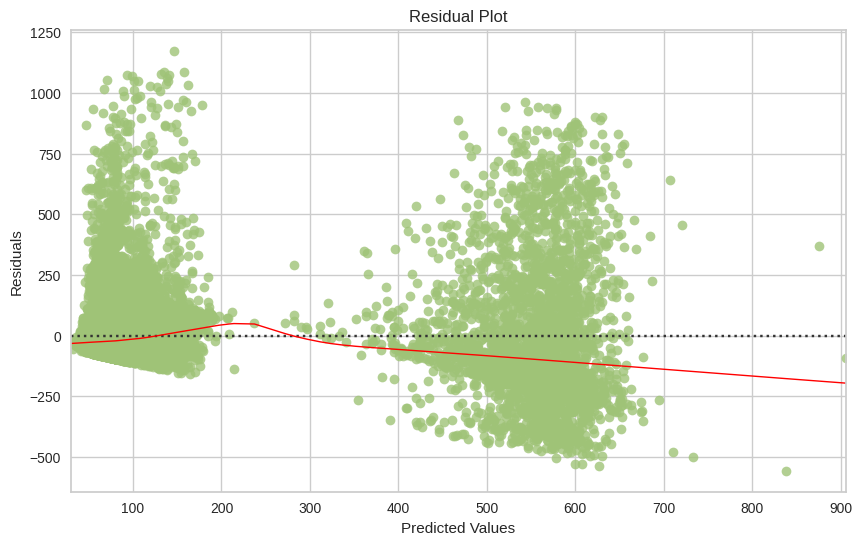

In [ ]:
import seaborn as sns
residuals = train['treatment_pd'] - fin_pred

# Plotting the residuals
plt.figure(figsize=(10, 6))
sns.residplot(x=fin_pred, y=residuals, lowess=True, color="g", line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

Output interpretation: By displaying the predicted minus the observed treatment periods on the y-axis and the predicted treatment periods on the x-axis, the residual plot allows us to visualize at a glance the accuracy of the model predictions. Most of the residuals are formed around zero on the y-axis, indicating that the model is not, for the most part, generally over- or underestimating the values for treatment periods. However, there is an increasing spread in the appearance of the residuals the further we go out on the x-axis, implying greater amounts of variable predictions for the long-range period. The red trend line, which ought to lie almost on top of the zero line, has a slight downward slope for longer predicted treatment periods. This could mean that the model harbors a particular bias, making it quite mediocre at predicting these lengthy treatments. All sorts of residuals get scattered and muddled around the predicted values, but the clusters that form at the lower end of the graph seem to tell a positive story. In general, our findings indicate that the model's short-term predictions are pretty accurate. But its long-term predictions aren't quite there yet. They need some refinement to bring them closer to what's going to happen. This could be improving the features we're selecting, the way we're tuning the model (by changing its parameters), or both.